# Homework  6



# Μηχανική μάθηση - Ροή εργασιών επανάληψη

Δεδομένου ότι είδαμε ήδη αρκετά και γνωρίζετε και εσείς καλά πως να κάνετε χρήση των αλγορίθμων που μάθαμε, θα επαναλάβουμε όλα τα βήματα άλλη μια φορά για να διασφαλίσουμε ότι κατανοούμε τις πιο σημαντικές έννοιες μέχρι στιγμής.

Σε αυτή την άσκηση θα περάσετε από ολόκληρη τη διαδικασία εισαγωγής και καθαρισμού δεδομένων, για να εκπαιδεύσετε στη συνέχεια δύο διαφορετικά μοντέλα και να τα συγκρίνετε. 

Προτείνεται να ξεκινήσετε μόνοι σας και να συμβουλευτείτε τις ιστοσελίδες του scikit-learn των οποίων τα links είναι παρακάτω. Αν κολλήσετε τότε ανατρέξτε στις προηγούμενες ασκήσεις.


Το dataset: Wine Quality Data Set

Εδώ στόχος μας είναι να προβλέψουμε την ποιότητα του κρασιού με βάση μερικά από τα χαρακτηριστικά του.

Η εργασία σας: Πρόβλεψη "ποιότητας" με βάση τις υπόλοιπες μεταβλητές.



Πηγή δεδομένων και λεπτομέρειες για τα δεδομένα: https://archive.ics.uci.edu/ml/datasets/wine+quality

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import RepeatedKFold

In [2]:
df_wine = pd.read_csv('winequality-white.csv', sep=";", header=0)
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
# 1) Δείτε τα δεδομένα και ελέγξτε για missing values (pandas.DataFrame.isnull)

print(df_wine.keys())
print(df_wine.shape) 
print(df_wine.head())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44  

In [4]:
# 2) Αφαιρέστε τις γραμμές που περιέχουν missing values (pandas.DataFrame.dropna)

df_wine.isnull().sum()  #den ehei

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Text(0.5,1,'White wine quality')

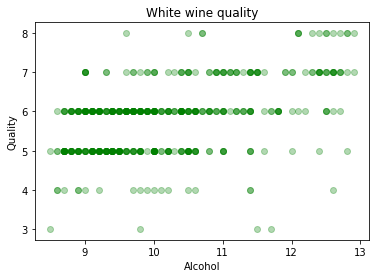

In [8]:
# 3) Διαλέξτε ποιες μεταβλητές συσχετίζονται με το (correlate) με το quality (pandas.DataFrame.corr)
# 4) Ελέγξτε ποια μεταβλητή έχει την υψηλότερη συσχέτιση με την ποιότητα και κάντε ένα γράφημα που δείχνει τη σχέση τους (scatter plot)

x_try = df_wine.alcohol[0:500]
y_try = df_wine.quality[0:500]

# Plot scatter plot
s1 = plt.scatter(x_try, y_try, color='g', marker='o', alpha = 0.3) # Plot data
# Add labels
plt.xlabel('Alcohol')  # Set xlabel
plt.ylabel('Quality') # Set ylabel
# Add title
plt.title('White wine quality') # Set title 

# Megalitero correlation me to alcohol content 
# Mporoume na to doume kai an paroume ena deigma me 500 entries kai to kanoume plot

In [9]:
# 5) Εκπαιδεύστε ένα μοντέλο Linear Regression χρησιμοποιώντας k-fold cross validation 

X = df_wine.drop(columns = 'quality')
y = df_wine['quality']

r2_scores = []


our_cv = RepeatedKFold(n_splits=10, n_repeats=10)

for i_train, i_test in our_cv.split(X):
  
    X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]

    lin_reg = LinearRegression()

    lin_reg.fit(X_train, y_train)  

    y_pred_test = lin_reg.predict(X_test)

    r2 = round(lin_reg.score(X_test, y_test), 2)

    r2_scores.append(r2)

Mean of r2 scores: 0.27 
Standard deviation of r2 scores: 0.04


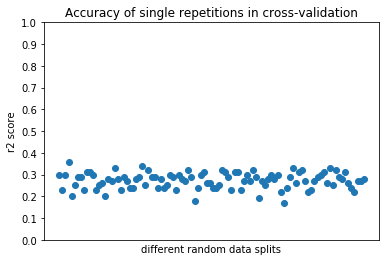

In [10]:
# 6) Φτιάξτε ένα plot με τα αποτελέσματα - πρέπει να προσθέσετε τη μεταβλητή r2_scores

#Calculating mean and standard deviation
mean_r2 = round(np.mean(r2_scores),2)
std_r2 = round(np.std(r2_scores),2)
print('Mean of r2 scores: {} \nStandard deviation of r2 scores: {}'
      .format(mean_r2, std_r2))

# Plotting accuracy of different random splits
plt.plot(r2_scores, marker='o', linestyle='None')
plt.xticks([])
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Accuracy of single repetitions in cross-validation')
plt.xlabel('different random data splits')
plt.ylabel('r2 score')
plt.show()

In [12]:
#7) Εκπαιδεύστε ένα Decision Tree χρησιμοποιώντας k-fold cross-validation


X = df_wine.drop(columns = 'quality')
y = df_wine['quality']

r2_scores = []

# (cv)
our_cv = RepeatedKFold(n_splits=10, n_repeats=10)

for i_train, i_test in our_cv.split(X):

    X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]

    dec_tree = DecisionTreeRegressor()

    dec_tree.fit(X_train, y_train)

    y_pred_test = dec_tree.predict(X_test)

    r2 = round(dec_tree.score(X_test, y_test), 2)

    r2_scores.append(r2)



Mean of r2 scores: 0.13 
Standard deviation of r2 scores: 0.09


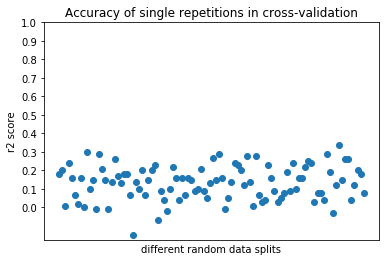

In [13]:
# apotelesmata Decision trees me cv

#Calculating mean and standard deviation
mean_r2 = round(np.mean(r2_scores),2)
std_r2 = round(np.std(r2_scores),2)
print('Mean of r2 scores: {} \nStandard deviation of r2 scores: {}'
      .format(mean_r2, std_r2))

# Plotting accuracy of different random splits
plt.plot(r2_scores, marker='o', linestyle='None')
plt.xticks([])
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Accuracy of single repetitions in cross-validation')
plt.xlabel('different random data splits')
plt.ylabel('r2 score')
plt.show()

In [ ]:
# 8) Συγκρίνετε τις αποδόσεις. Ποιο μοντέλο είναι καλύτερο και γιατί?

#To linear model einai kalitero me R²  0.27

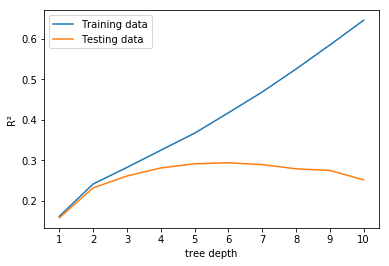

In [14]:
#9) Βελτιώστε το decision tree ελέγχοντας το βάθος του 


ls_total_r2_test = []
ls_total_r2_train = []

ls_max_depth = []

for current_max_depth in np.arange(10): 
    
    our_cv = RepeatedKFold(n_splits=10, n_repeats=10)
    
    dec_tree = DecisionTreeRegressor(max_depth=current_max_depth+1)
    
    ls_r2_test = []
    ls_r2_train = []
    
    for i_train, i_test in our_cv.split(X):
        
        X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]
        
        dec_tree.fit(X_train, y_train)
       
        y_pred_test = dec_tree.predict(X_test)
        y_pred_train = dec_tree.predict(X_train)
        
        current_r2_test = r2_score(y_test, y_pred_test)
        current_r2_train = r2_score(y_train, y_pred_train)
        
        ls_r2_test.append(current_r2_test)
        ls_r2_train.append(current_r2_train)

    ls_max_depth.append(current_max_depth+1)

    ls_total_r2_test.append(np.mean(ls_r2_test))  
    ls_total_r2_train.append(np.mean(ls_r2_train))  
    

plt.plot(ls_max_depth, ls_total_r2_train, label="Training data")
plt.plot(ls_max_depth, ls_total_r2_test, label="Testing data")
plt.xticks(np.arange(10)+1)
plt.xlabel('tree depth')
plt.ylabel('R²')
plt.legend()
plt.show()


In [15]:
# To kalitero depth einai to 6, to vazoume sto idi etoimo modelo kai paratiroume ti veltiwsi

Mean of r2 scores: 0.3 
Standard deviation of r2 scores: 0.04


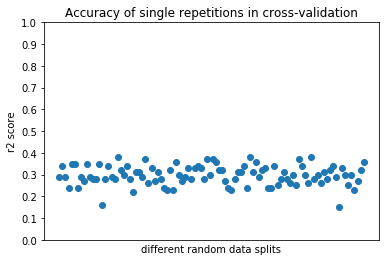

In [18]:
X = df_wine.drop(columns = 'quality')
y = df_wine['quality']

r2_scores = []


our_cv = RepeatedKFold(n_splits=10, n_repeats=10)

for i_train, i_test in our_cv.split(X):
    
    X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]
    
    dec_tree = DecisionTreeRegressor(max_depth=6)
    
    dec_tree.fit(X_train, y_train)
    
    y_pred_test = dec_tree.predict(X_test)
    
    r2 = round(dec_tree.score(X_test, y_test), 2)
   
    r2_scores.append(r2)
    

mean_r2 = round(np.mean(r2_scores),2)
std_r2 = round(np.std(r2_scores),2)
print('Mean of r2 scores: {} \nStandard deviation of r2 scores: {}'
      .format(mean_r2, std_r2))


plt.plot(r2_scores, marker='o', linestyle='None')
plt.xticks([])
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Accuracy of single repetitions in cross-validation')
plt.xlabel('different random data splits')
plt.ylabel('r2 score')
plt.show()

In [ ]:
#to kalitero apotelesma 0.3 